In [36]:
import numpy as np
import matplotlib.pyplot as plt
import openpiv
%matplotlib inline


In [37]:
im1 = openpiv.tools.imread('../Data/Test von Karman/PIVlab_Karman_01.bmp')
im2 = openpiv.tools.imread('../Data/Test von Karman/PIVlab_Karman_02.bmp')

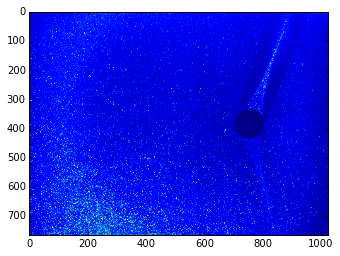

In [38]:
plt.imshow(im1)

In [39]:
# masking
imMask = openpiv.tools.imread('../Data/Test von Karman/PIVlab_Karman_mask.png')

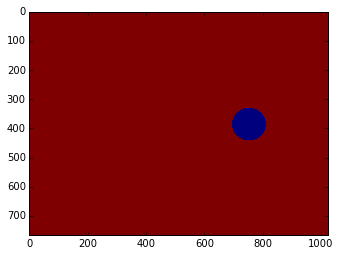

In [40]:
plt.imshow(imask)

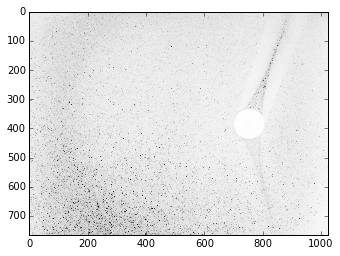

None

<function __main__.view_image>

In [41]:
# visualize the shift of two images
from ipywidgets import interact

images = [im1,im2]
def view_image(i):
    plt.imshow(images[i], cmap=plt.cm.gray_r)
    plt.show()
    
interact(view_image, i=(0,1))

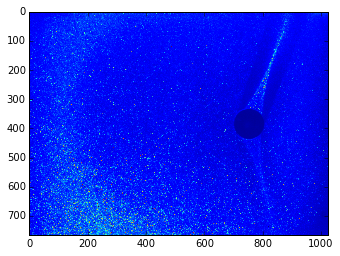

In [42]:
plt.imshow(im1-imask)

In [43]:
x,y,u,v, mask = openpiv.process.WiDIM(im1.astype(np.int32), im2.astype(np.int32), imask.astype(np.int32), \
                                      min_window_size=16, overlap_ratio=0.25, coarse_factor=2, dt=1., \
                                      validation_method='mean_velocity', trust_1st_iter=1, validation_iter=2, \
                                      tolerance=0.7, nb_iter_max=4, sig2noise_method='peak2peak')

/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: deprecated
  if __name__ == '__main__':
/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
Algorithm :  WiDIM
 
Parameters   
-----------------------------------
      Size of image  |  [765, 1024]
      total number of iterations  |  4
      overlap ratio  |  0.25
      coarse factor  |  2
      time step  |  1.0
      validation method  |  mean_velocity
      number of validation iterations  |  2
      subpixel_method  |  gaussian
      Nrow  |  [15 31 63 63]
      Ncol  |  [21 42 85 85]
      Window sizes  |  [64 32 16 16]
-----------------------------------
|           STARTING              |
-----------------------------------
 
/////////////////////////////////////////


 --residual :  0.999999999427
no validation : trusting 1st iteration
going to next iteration.. 
performing interpolation of the displacement field
 
..[DONE] -----> going to iteration 

Performing interpolations : 100% [------------------] Time: 0:00:00 765.22  B/s


 1
 
 
//////////////////////////////////////////////////////////////////
 
ITERATION #  1
 
..[DONE]


 --residual :  0.169044664916
Starting validation..
Validation, iteration number  0
 
Validation, iteration number 

 1
 
..[DONE]

Validation : 100% [---------------------------------] Time: 0:00:00   1.13 kB/s



 
going to next iteration.. 
performing interpolation of the displacement field
 
..[DONE] -----> going to iteration 

Performing interpolations : 100% [------------------] Time: 0:00:00 290.36  B/s


 2
 
 
//////////////////////////////////////////////////////////////////
 
ITERATION #  2
 
..[DONE]


 --residual :  0.213235293995
Starting validation..
Validation, iteration number  0
 
Validation, iteration number 

 1
 
..[DONE]

Validation : 100% [---------------------------------] Time: 0:00:00 428.95  B/s
Performing interpolations : 100% [------------------] Time: 0:00:00  17.90 kB/s



 
going to next iteration.. 
performing interpolation of the displacement field
 
..[DONE] -----> going to iteration  3
 
 
//////////////////////////////////////////////////////////////////
 
ITERATION #  3
 
..[DONE]


 --residual :  0.0959653091456
Starting validation..
Validation, iteration number  0
 
Validation, iteration number 

 1
 
..[DONE]
 
//////////////////////////////////////////////////////////////////
end of iterative process.. Re-arranging vector fields..
...[DONE]
-------------------------------------------------------------
[DONE] ..after  72.8668088913 seconds 
-------------------------------------------------------------


Validation : 100% [---------------------------------] Time: 0:00:00 532.40  B/s


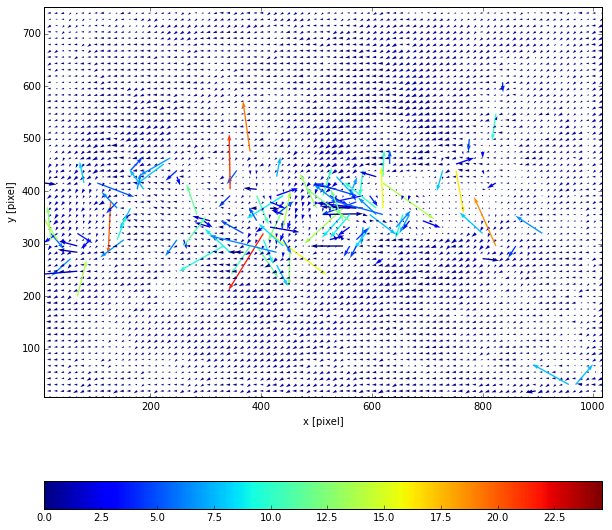

In [44]:
plt.figure(figsize=(10,10))
plt.quiver(x,y,u,v,(np.abs(v)))
plt.axis('tight')
ax.set_aspect(.9)
plt.colorbar(orientation='horizontal')
plt.xlabel('x [pixel]')
plt.ylabel('y [pixel]')